# Kim_atlas_rearrange
The purpose of this notebook is to rearrange the Kim group atlas so it is in the same orientation as the PMA and Allen atlases and can be used a registration atlas in BrainPipe

In [65]:
import neuroglancer
import json, csv
import numpy as np
import pandas as pd
from cloudvolume import CloudVolume
import matplotlib.pyplot as plt
import tifffile
%matplotlib inline  

In [4]:
# Point to the csv files for both atlases containing the region names and voxel counts 
vol = CloudVolume('file:///home/ahoag/ngdemo/demo_bucket/atlas/kimatlas')

data=np.transpose(vol[:][...,0],(2,1,0))

Downloading: 100%|██████████| 246/246 [00:02<00:00, 115.90it/s]


In [5]:
data.shape

(123, 800, 1140)

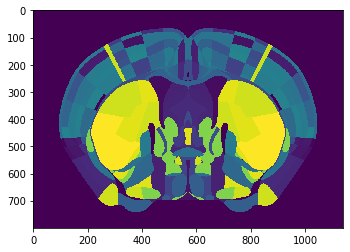

In [7]:
plt.imshow(data[45])

We need to rearrange this volume so that the z slices are arranged in the same way as princetonmouse, i.e.

In [8]:
pma_vol = CloudVolume('file:///home/ahoag/ngdemo/demo_bucket/atlas/princetonmouse')

In [9]:
pma_data=np.transpose(pma_vol[:][...,0],(2,1,0))

Downloading: 100%|██████████| 540/540 [00:02<00:00, 221.44it/s]


In [10]:
pma_data.shape

(540, 640, 352)

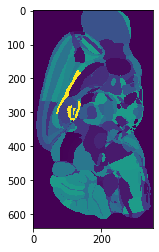

In [56]:
plt.imshow(pma_data[300],vmin=0,vmax=2000)

In [40]:
rearranged_data = np.flip(np.swapaxes(data,0,2),2)

In [41]:
rearranged_data.shape

(1140, 800, 123)

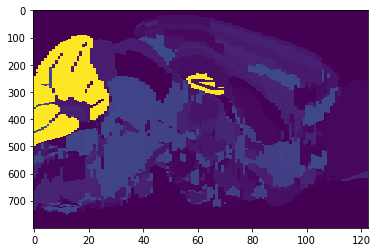

In [42]:
plt.imshow(rearranged_data[500],aspect='auto')

In [23]:
rearranged_data.shape

(1140, 800, 123)

That is closer. Now need to swap x and y and then flip y

In [48]:
rearranged_data2 = np.flip(np.swapaxes(rearranged_data,1,2),1)

In [50]:
rearranged_data2.shape

(1140, 123, 800)

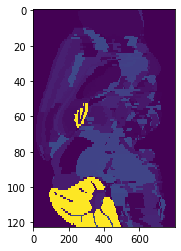

In [58]:
plt.imshow(rearranged_data2[500],aspect=10)

OK looks good. Let's save this volume

In [67]:
tifffile.imsave('/home/ahoag/ngdemo/data/Chon_et_al/KimRef_annotation_volume_4brainpipe.tif',rearranged_data2)

# Now rearrange the tissue volume as well

In [69]:
# Point to the csv files for both atlases containing the region names and voxel counts 
vol_tissue = CloudVolume('file:///home/ahoag/ngdemo/demo_bucket/atlas/kimatlas_tissue')

data_tissue=np.transpose(vol_tissue[:][...,0],(2,1,0))

Downloading: 100%|██████████| 246/246 [00:01<00:00, 127.45it/s]


In [70]:
rearranged_data_tissue = np.flip(np.swapaxes(data_tissue,0,2),2)
rearranged_data2_tissue = np.flip(np.swapaxes(rearranged_data_tissue,1,2),1)

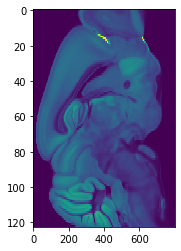

In [71]:
plt.imshow(rearranged_data2_tissue[500],aspect=10)

In [72]:
# save this volume as well

In [73]:
tifffile.imsave('/home/ahoag/ngdemo/data/Chon_et_al/KimRef_tissue_volume_4brainpipe.tif',rearranged_data2_tissue)

In [ ]:
# Check that Lindsay's